<a href="https://colab.research.google.com/github/HIT18216/Homework/blob/main/Discrete%20Mathematics/%EC%A3%BC%EC%A0%9C6_(7%2C8)_%EA%B7%B8%EB%9E%98%ED%94%84_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제 7 & 8: 그래프 알고리즘
---
박정현(pwjdgus1017@donga.ac.kr), 배정훈(rhenus9911@gmail.com), 최재혁(fkdlfkdl68@donga.ac.kr), 권건우(a71463092@gmail.com)
---
우리는 그래프에 대한 이론을 학습하였다. 특히, 우리는 다양한 그래프에 대한 종류(Complete graph, isomorphism graph, homomorphism graph, spanning graph, euler graph, hamilton graph 등을 학삽하였다. 또한 그에 관련된 알고리즘으로써, 우리는 그래프 종류에 대한 평가 방법(각 그래프 종류 판별법) 및 관련된 알고리즘(판매원 탐방, 최단 경로, 그래프 컬러링 등)를 학습하였다. 이를 기반으로, 아래의 주어진 문제 7, 8 에 대한 코드를 작성하시오.




# 해당파일 활용 방법- [메뉴] 파일->드라이브에 사본 저장을 통해서 프로그램 실행하시면 됩니다.

https://drive.google.com/drive/folders/1-aB3OQy8BSr_lolDm-3jquzdr_HumoNU?usp=sharing

위의 공유 폴더링크 에서 데이터셋을 다운로드 받아서, 업로드하고 프로그램 수행하시기 바랍니다.

- airports.csv
- 188591317_T_ONTIME.csv.gz

# 문제 7: 여러가지 그래프 판별법
Isomorphism graph, Sparse and Dense graphs, Euler and Hamiltonian graph를 인지를 확인하는 코드를 작성하시오.


In [ ]:
import networkx as nx

## 문제 7-1: Isomorphism
주어진 두 Directed 그래프 (G1, G2) 로부터 Isomorphism graph 인지를 판별하기

In [ ]:
def is_isomorphic(G1, G2):
  '''
  G1과 G2가 isomorphic 관계인지를 체크
  :param G1: Directed 그래프
  :param G2: Directed 그래프
  :return: Boolean
  '''
  if G1.number_of_nodes()!=G2.number_of_nodes():
    if G1.number_of_edges()!=G2.number_of_edges():
      return False
  i=0
  j=G1.number_of_nodes()
  while i<j:
    for n in G1:
      for m in G2:
        if G1.in_degree(n) == G2.in_degree(m):
          if G1.out_degree(n) == G2.out_degree(m):
            G2.remove_node(m)
            break
      if G1.number_of_nodes()!= G2.number_of_nodes():
        G1.remove_node(n)
        break
    i=i+1
  if G1.number_of_nodes() == 0:
    if G2. number_of_nodes() == 0:
      return True
  return False

In [ ]:
g1 = nx.DiGraph()
g2 = nx.DiGraph()
nx.add_path(g1, [1,2,3,4,5,6,7,8,9,10])
nx.add_path(g2, [10,20,30,40,50,60,70,80,90,100])
print(is_isomorphic(g1,g2)) # nx.is_isomorphic 사용하지 말 것

True


## 문제 7-2: Graph Density
다음 그래프에 대해서 Graph Density를 계산하는 구하는 함수 def calculate_density()를 작성하여라. 또한

In [ ]:
def calculate_density(G):
  '''
  :param G: directed 그래프
  :return: graph density의 값 [0,1]
  '''
  return G.number_of_edges()/(G.number_of_nodes()*(G.number_of_nodes()-1))

In [ ]:
g = nx.watts_strogatz_graph(50, 20, 1)
calculate_density(g) # nx.density 사용하지 말 것

0.20408163265306123

## 문제 7-3: Euler graph
다음 주어진 그래프가 Euler graph 인지를 확인하는 코드를 작성하시오

In [ ]:
def is_Eulerian(g):
  '''
  :param g: undirected graph
  :return: Boolean
  '''
  for n in g:
    if g.degree(n)%2!=0:
      return False
  return True

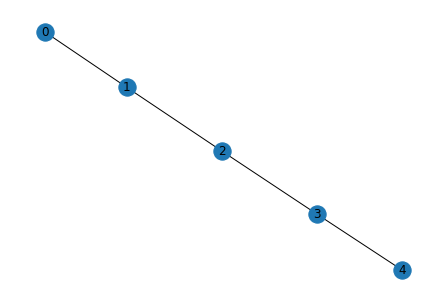

In [ ]:
g = nx.path_graph(5)
nx.draw(g, with_labels=True)

In [ ]:
is_Eulerian(g) # nx.is_Eulerian 사용하지 말 것

False

# 문제 8: 그래프 알고리즘 사용하기

그래프 알고리즘이 주로 사용되는 예는 항공운항정보의 네트워크를 구성할때 사용한다. 그래프 모델에서, 항공사(airlines)혹은 공항(airports)는 노드(Nodes/Vertices)로 구성되고 각 공항간의 운항 정보는 관계(Relationships/Edges)로 표현된다.

## 항공운항정보 데이터 셋업

In [ ]:
import pandas as pd

In [ ]:
# 공항 정보, 항공사, 운항정보를 불러오기를 수행한다
airports = pd.read_csv("airports.csv", header=None)

In [ ]:
usa_airports = airports[airports.iloc[:, 3] == 'United States'] # 미국 내 공항만 추출

In [ ]:
usa_airports = usa_airports.loc[:,[1,4,6,7]]
usa_airports.rename(columns={1: 'name', 4: 'id', 6: 'latitude', 7: 'longitude'}, inplace=True)
usa_airports
# column_names=['name','id','latitude','longitude']

,name,id,latitude,longitude
3200,Barter Island LRRS Airport,BTI,70.134003,-143.582001
3201,Cape Lisburne LRRS Airport,LUR,68.875099,-166.110001
3202,Point Lay LRRS Airport,PIZ,69.732903,-163.005005
3203,Hilo International Airport,ITO,19.721399,-155.048004
3204,Orlando Executive Airport,ORL,28.545500,-81.332901
...,...,...,...,...
6996,Cape Canaveral AFS Skid Strip,XMR,28.467600,-80.566597
6997,Homey (Area 51) Airport,\N,37.235001,-115.810997
6998,Zanesville Municipal Airport,ZZV,39.944401,-81.892097
7048,Nenana Municipal Airport,ENN,64.547302,-149.074005


In [ ]:
trips = pd.read_csv("188591317_T_ONTIME.csv.gz", low_memory=False)

In [ ]:
trips.rename(columns={"ORIGIN":"src", "DEST":"dst", "DEP_DELAY":"deptDelay", "ARR_DELAY":"arrDelay","TAIL_NUM":"tailNumber","FL_NUM":"flightNumber","FL_DATE":"date", "CRS_DEP_TIME":"time","CRS_ARR_TIME":"arrivalTime","DISTANCE":"distance","UNIQUE_CARRIER":"airline"}, inplace=True)

In [ ]:
G = nx.from_pandas_edgelist(trips, source="src", target="dst", edge_attr=['distance'], create_using=nx.DiGraph())

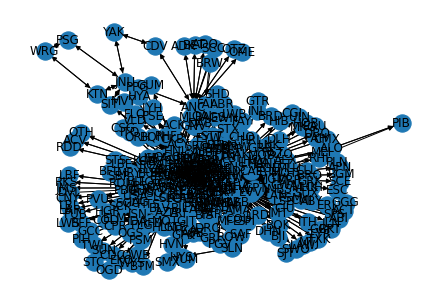

In [ ]:
nx.draw(G, with_labels=True, arrows=True)

In [ ]:
trips

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,date,airline,AIRLINE_ID,CARRIER,tailNumber,flightNumber,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,src,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,dst,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,time,DEP_TIME,deptDelay,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,...,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,DIV2_AIRPORT,DIV2_AIRPORT_ID,DIV2_AIRPORT_SEQ_ID,DIV2_WHEELS_ON,DIV2_TOTAL_GTIME,DIV2_LONGEST_GTIME,DIV2_WHEELS_OFF,DIV2_TAIL_NUM,DIV3_AIRPORT,DIV3_AIRPORT_ID,DIV3_AIRPORT_SEQ_ID,DIV3_WHEELS_ON,DIV3_TOTAL_GTIME,DIV3_LONGEST_GTIME,DIV3_WHEELS_OFF,DIV3_TAIL_NUM,DIV4_AIRPORT,DIV4_AIRPORT_ID,DIV4_AIRPORT_SEQ_ID,DIV4_WHEELS_ON,DIV4_TOTAL_GTIME,DIV4_LONGEST_GTIME,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM,Unnamed: 109
0,2018,2,5,1,2,2018-05-01,DL,19790,DL,N6709,15,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14869,1486903,34614,SLC,"Salt Lake City, UT",UT,49,Utah,87,1920,1919.0,-1.0,0.0,0.0,-1.0,1900-1959,15.0,1934.0,2113.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,2,5,1,2,2018-05-01,DL,19790,DL,N820DN,16,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1400,1407.0,7.0,7.0,0.0,0.0,1400-1459,21.0,1428.0,2052.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,2,5,1,2,2018-05-01,DL,19790,DL,N856DN,17,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,1757,1753.0,-4.0,0.0,0.0,-1.0,1700-1759,19.0,1812.0,1932.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,2,5,1,2,2018-05-01,DL,19790,DL,N329NB,22,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,1335,1329.0,-6.0,0.0,0.0,-1.0,1300-1359,14.0,1343.0,1554.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,2,5,1,2,2018-05-01,DL,19790,DL,N697DL,23,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,13487,1348702,31650,MSP,"Minneapolis, MN",MN,27,Minnesota,63,1556,1602.0,6.0,6.0,0.0,0.0,1500-1559,21.0,1623.0,1647.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616524,2018,2,5,17,4,2018-05-17,UA,19977,UA,N76502,1434,13198,1319801,33198,MCI,"Kansas City, MO",MO,29,Missouri,64,12266,1226603,31453,IAH,"Houston, TX",TX,48,Texas,74,625,617.0,-8.0,0.0,0.0,-1.0,0600-0659,11.0,628.0,758.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616525,2018,2,5,17,4,2018-05-17,UA,19977,UA,N73860,1431,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,12173,1217305,32134,HNL,"Honolulu, HI",HI,15,Hawaii,2,1407,1409.0,2.0,2.0,0.

미국 공항 개수, 항로의 수

In [ ]:
G.number_of_nodes()

341

In [ ]:
G.number_of_edges()

5339

## 최단거리 알고리즘
최단거리 알고리즘은 다양한 방법들이 존재한다. 학습한 Dijkstra 이외에도, A*, Bellman-Ford, Floyd-Warshall, Yen's 등 다양한 알고리즘이 존재한다.
https://networkx.org/documentation/stable//reference/algorithms/shortest_paths.html#
참고하여 다음 문제를 해결하시오

## 문제 8-1: 최단거리 문제
샌프란시스코 국제 공항(San Francisco International Airport)과 뉴욕의 존 F 케네디 국제 공항(John F Kennedy International Airport)사이에 직항(non-stop flight)이 있는지 찾으시오.
힌트: 공항 코드를 사용하여, 두 공항 사이에 최단거리 경로 내 경유 공항이 있는지를 확인

출력의 결과는 참고용입니다.

In [ ]:
# 샌프란시스코 국제 공항을 찾는 예제
src = usa_airports[usa_airports.name.str.contains('San Francisco International Airport')]
# 존 F 케네디 국제 공황을 찾는 예제
dst = usa_airports[usa_airports.name.str.contains('John F Kennedy International Airport')]
# 공항코드 검색
# your code here

In [ ]:
def has_nonstop_flight(graph, src, dst):
  '''
  두 공항 사이에 non-stop flight가 있는지 체크하는 함수
  :param graph: trips 그래프
  :param src: 출발 공항
  :param dst: 목적 공항
  :return: Boolean
  '''
  for i in graph.edges():
    if i == (src.iloc[0,1],dst.iloc[0,1]):
      return True
  return False

In [ ]:
has_nonstop_flight(G, src, dst)

True

## 문제 8-2: 주어진 공항들을 순서대로 경유하는 경로의 최단 거리(distance)를 계산하는 함수를 작성하시오

다음 4개의 공항을 순서대로 경유하면 된다.(출발 시간은 고려하지 않는다)
Los Angeles International Airport -> Hartsfield Jackson Atlanta International Airport -> Miami International Airport -> Washington Dulles International Airport


In [ ]:
def shortest_path_length_from_airports(graph, airport_seq):
  '''
  주어진 공항의 시퀀스(sequence)로부터 최단경로의 거리를 계산하시오
  :param graph: trips 그래프
  :param airport_seq: 공항정보 (list형)
  :return: 총 거리(distance) 값(float형)
  '''
  min=100000000000
  sum = 0
  k = 0
  for i in airport_seq:
    for j in graph.edges():
      if k == len(airport_seq)-1:
        break
      if j == (airport_seq[k],airport_seq[k+1]):
        if min> graph[j[0]][j[1]]['distance']:
          min = graph[j[0]][j[1]]['distance']
    if k == len(airport_seq)-1:
      break
    else:
      sum = sum+min
      min = 100000000000
      k = k+1
  return sum

In [ ]:
a = usa_airports[usa_airports.name.str.contains('Los Angeles International Airport')]
b = usa_airports[usa_airports.name.str.contains('Hartsfield Jackson Atlanta International Airport')]
c = usa_airports[usa_airports.name.str.contains('Miami International Airport')]
d = usa_airports[usa_airports.name.str.contains('Washington Dulles International Airport')]
seq = [a.iloc[0,1],b.iloc[0,1],c.iloc[0,1],d.iloc[0,1]]
shortest_path_length_from_airports(G, seq)

3462.0

## 문제 8-3: 단일 출발지 최단거리 찾기 (Single source shortest path)
Los Angeles International Airport 국제 공항에서 직항(Non-stop)으로 이동할수 있는 공항 중에서 가장 가까운 공항과 가장 먼 공항을 반환하는 함수를 작성하시오

In [ ]:
def get_farthest_or_shortest_airports_from(graph, src):
  '''
  가장 멀거나
  :param graph: trips 그래프
  :param src: 출발지
  :return: ( farthest airport code, shortest airport code ) (tuple 형으로 반환)
  '''
  min = 1000000
  max = 0
  shortair=[]
  farair=[]
  for i in graph.edges():
    if i[0] == src.iloc[0,1]:
      if graph[i[0]][i[1]]['distance']>max:
        max = graph[i[0]][i[1]]['distance']
        farthest= i[1]
      if graph[i[0]][i[1]]['distance']<min:
        min = graph[i[0]][i[1]]['distance']
        shortest = i[1]
  for i in graph.edges():
    if i[0] == src.iloc[0,1]:
      if graph[i[0]][i[1]]['distance'] == max:
        farair.append(i[1])
      if graph[i[0]][i[1]]['distance'] == min:
        shortair.append(i[1])
  return (farair,shortair)

In [ ]:
src = usa_airports[usa_airports.name.str.contains('Los Angeles International Airport')]
get_farthest_or_shortest_airports_from(G, src)

(['LIH'], ['SBA'])

## 문제 8-4: 출발을 제일 많이 하는 공항은?
주어진 trips 그래프로부터 제일 많은 수의 출발지(src)를 가진 공항이 어디인지 탐색하시오.

In [ ]:
def get_airport_with_highest_out_degree(graph):
  '''
  graph로부터 가장 높은 out-degree를 가진 공항을 찾아서 반환
  :param graph: trips 그래프
  :return: ( airport code )
  '''
  outdegree=[]
  max = 0
  count = 0
  for i in graph.nodes():
    for j in graph.edges():
      if j[0] == i:
        count = count+1
    if count>max:
      max = count
      count =0
    else:
      count = 0
  count = 0
  for i in graph.nodes():
    for j in graph.edges():
      if j[0] == i:
        count = count+1
    if count == max:
      outdegree.append(i)
      count =0
    else:
      count = 0
  return outdegree

In [ ]:
get_airport_with_highest_out_degree(G)

['ATL', 'DFW']

## Floyd Washall 알고리즘 활용
Floyd Washall 알고리즘은 모든 쌍의 경로의 가중치를 계산하는 데 사용된다. 다음 예제를 사용하여 우리는 LAX 코드를 가진 공항에서 출발하는 모든 공항에 대한 최단경로의 거리값을 계산할 수 있다.
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.dense.floyd_warshall.html#networkx.algorithms.shortest_paths.dense.floyd_warshall

In [ ]:
all_pairs_shortest_path = nx.floyd_warshall(G, weight='distance')

In [ ]:
# 예시 floyd_warshall
for k, dists in all_pairs_shortest_path.items():
  if k == 'LAX':
    print(dists)

defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7ff2acf9d290>, {'LAX': 0, 'ATL': 1946.0, 'SEA': 954.0, 'JFK': 2475.0, 'BNA': 1797.0, 'MSY': 1670.0, 'HNL': 2556.0, 'DFW': 1235.0, 'TPA': 2158.0, 'MCI': 1363.0, 'AUS': 1242.0, 'DEN': 862.0, 'IND': 1814.0, 'SLC': 590.0, 'PDX': 834.0, 'CVG': 1900.0, 'MCO': 2218.0, 'DTW': 1978.0, 'RDU': 2239.0, 'OGG': 2486.0, 'LAS': 236.0, 'KOA': 2504.0, 'MSP': 1535.0, 'DCA': 2311.0, 'LIH': 2615.0, 'SAN': 109.0, 'BOS': 2610.0, 'SFO': 337.0, 'MEM': 1619.0, 'CMH': 1995.0, 'MIA': 2342.0, 'SJC': 308.0, 'MFR': 630.0, 'BLI': 1047.0, 'SGF': 1423.0, 'TUL': 1283.0, 'EUG': 748.0, 'BOI': 674.0, 'PVU': 569.0, 'MSO': 923.0, 'EWR': 2454.0, 'IAD': 2288.0, 'ORD': 1744.0, 'IAH': 1379.0, 'CLE': 2052.0, 'BWI': 2329.0, 'ITO': 2449.0, 'SDF': 1843.0, 'ANC': 2345.0, 'PHL': 2401.0, 'FLL': 2342.0, 'DAL': 1246.0, 'ABQ': 677.0, 'ELP': 715.0, 'HOU': 1390.0, 'MDW': 1750.0, 'MKE': 1756.0, 'OAK': 337.0, 'PHX': 370.0, 'PIT': 2136.0, 'RN

## 문제 8-5: 2시간 내 도착지 계산 (Floyd Washall 알고리즘의 활용)
비행기의 속도가 500 km/h 라고 가정할 때 2시간내로 도착하는 공항 코드를 반환하는 함수를 작성하시오

In [ ]:
def get_airports_within_2hours(G, src, speed):
  '''
  2시간내
  :param G: trips 그래프
  :param speed: 비행기의 속도  km/h
  :return: 공항 코드 (list 형)
  '''
  airport = []
  for k,dists in all_pairs_shortest_path.items():
    if k == src:
      for i in G.nodes():
        if dists[i]<speed*2:
          airport.append(i)
  return airport


In [ ]:
flight_speed = 500 # km/h
src = 'LAX'
get_airports_within_2hours(G,src,flight_speed)

['SLC',
 'LAS',
 'SAN',
 'SEA',
 'OAK',
 'RNO',
 'SFO',
 'PDX',
 'LAX',
 'DEN',
 'PHX',
 'GEG',
 'BIL',
 'SMF',
 'SNA',
 'SJC',
 'JAC',
 'BOI',
 'BZN',
 'ELP',
 'ABQ',
 'TUS',
 'MSO',
 'COS',
 'AZA',
 'PVU',
 'MFR',
 'FAT',
 'SCK',
 'SMX',
 'PSC',
 'IDA',
 'EUG',
 'PSP',
 'GJT',
 'MRY',
 'ONT',
 'SBA',
 'BUR',
 'EGE',
 'AMA',
 'LBB',
 'MAF',
 'LGB',
 'SAF',
 'ROW',
 'SBP',
 'DRO',
 'BFL',
 'STS',
 'ASE',
 'FLG',
 'RDM',
 'YUM',
 'SGU',
 'TWF',
 'PIH',
 'CPR',
 'HLN',
 'SUN',
 'PUB',
 'LAR',
 'RDD',
 'ACV',
 'OTH',
 'COD',
 'BTM',
 'CDC',
 'EKO',
 'WYS']

완료한 숙제는 ipynb 파일형식으로 다운로드 받아서, 가상대학 내 [과제 7,8에 업로드하시기 바랍니다.

# 감사합니다.